---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo ciclo del 2022

---

[comment]: <> (Modificar esta sección con datos personales)

* Estudiante: **Nombre completo de estudiante**
* Carné: **D01234**
* Grupo: **1/2/3**

# `P2` - *Variables aleatorias*

> Este es un ejercicio de análisis y modelado probabilístico de datos con las herramientas de programación y cálculo numérico de Python.

**Nota**: Es recomendable revisar los tutoriales `Py3`, `Py4` y `Py5` (disponibles [aquí](https://github.com/fabianabarca/mpss)) para conocer las bases de Python útiles en la ejecución de este laboratorio.

---

---
## Problema

El documento `arboles.csv` contiene mediciones realizadas a una multitud considerable de árboles en ambas orillas de una carretera nacional, los cuales necesitaban ser cortados para una ampliación (actualmente en construcción). El archivo registra el nombre, el diámetro, la altura y otros datos.

**Nota**: existe una estrategia de compensación ambiental por la corta de los árboles para las obras, que incluye reforestación en zonas aledañas.

#### Importación y revisión de datos

Primeramente, es útil hacer la importación y una revisión rápida de los datos, para observar su estructura.

In [2]:
import pandas as pd

# Importar CSV en un DataFrame
arboles = pd.read_csv('arboles.csv')

# Mostrar primeros datos
arboles.head()

,Secuencia,Nombre común,Diámetro (cm),Altura total (m),Altura comercial (m),Volumen comercial (m3),Valor comercial aproximado (CRC)
0,I0001,roble sabana,64.6,12.0,6.0,1.0,31323.29
1,I0002,roble sabana,56.0,10.0,4.0,0.0,15692.32
2,I0003,jocote,32.0,4.0,2.0,0.0,0.00
3,I0004,cenízaro,72.4,13.0,4.0,1.0,54545.22
4,I0005,guayaquil,55.3,11.0,6.0,1.0,19301.97


También es posible hacer una descripción estadística básica con la cantidad total de árboles, la media de cada columna, la desviación estándar, el valor mínimo, el primer, segundo y tercer cuartil y el valor máximo.

In [3]:
# Breve descripción estadística
arboles.describe()

,Diámetro (cm),Altura total (m),Altura comercial (m),Volumen comercial (m3),Valor comercial aproximado (CRC)
count,10681.000000,10681.000000,8850.000000,10681.000000,1.068100e+04
mean,33.363187,9.548825,2.627989,0.132063,9.352564e+03
std,21.485462,3.812823,1.516758,0.595048,3.764279e+04
min,15.000000,1.500000,0.000000,0.000000,0.000000e+00
25%,20.000000,7.000000,1.500000,0.000000,0.000000e+00
50%,26.400000,8.000000,2.000000,0.000000,1.133880e+03
75%,38.600000,12.000000,3.000000,0.000000,4.193840e+03
max,292.000000,25.000000,15.000000,18.000000,1.290347e+06


### Asignaciones

1. (10 %) Determine la cantidad de especies distintas de árboles y lístelas en orden alfabético.
1. (20 %) Grafique el histograma de la distribución del diámetro de 10 árboles distintos elegidos por usted, en gráficas distintas.
1. (30 %) Determine los parámetros del modelo de mejor ajuste para la selección de dos árboles dados por `asignaciones()`. Grafique las curvas junto con los histogramas para cada caso, en una misma gráfica.
1. (10 %) Determine cuál es la especie de árbol con mayor valor comercial promedio.
1. (30 %) Hay interés en conocer la distribución de probabilidad del área transversal de los árboles con el diámetro dado. Para una especie de árbol asignada con la función `asignaciones()`, encuentre el **modelo exponencial** de mejor ajuste y luego determine teóricamente la distribución de probabilidad del área transversal de los árboles con el diámetro dado. Seguidamente, grafique el modelo obtenido junto con el histograma de las áreas transversales para el árbol elegido y verifique la correspondencia.

**Nota**: los datos de área transversal se pueden obtener fácilmente con la fórmula $\pi r^2$ a partir de los datos de diámetro disponibles para el árbol seleccionado.

In [8]:
import pandas as pd
def cantidad_arboles():
    """
    Asignación: 1
    Determina la cantidad de especies de arboles en
    el archivo arboles.csv y las lista en orden alfabetico
    """
    arboles = pd.read_csv('arboles.csv')
    # Mostrar primeros datos
    arboles.head()
    
cantidad_arboles()

In [9]:
import random

def asignaciones(digitos):
    '''Función que asigna un árbol y una
    combinación de dos árboles a cada persona
    con base en los dígitos de su carné.
    '''
    random.seed(digitos)
    lista = arboles['Nombre común'].unique()
    return (random.choice(lista), random.choices(lista, k=2))

digitos = 76543
mis_arboles = asignaciones(digitos)
print('Mis dos árboles son: {} y {}.'.format(mis_arboles[1][0], mis_arboles[1][1]))
print('Mi árbol es: {}.'.format(mis_arboles[0]))

Mis dos árboles son: almendro de montaña y cortez de chivo.
Mi árbol es: cenízaro.


Fitting 3 distributions: 100%|██████████| 3/3 [00:02<00:00,  1.04s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.002111,878.732557,-153683.657248,inf,0.006353,8.143647e-01
rayleigh,0.031165,1102.805982,-126769.529270,inf,0.078650,3.735067e-54
uniform,0.373467,601.317852,-101934.234783,inf,0.514453,0.000000e+00


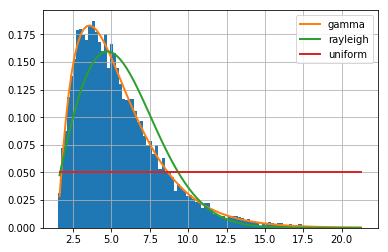

In [10]:
from scipy import stats
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=10000)
from fitter import Fitter
f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

---
**Forma de entrega**

- Este proyecto se entrega como un documento PDF con el formato especificado en la plantilla de LaTeX disponible en Overleaf aquí: https://www.overleaf.com/read/qttjvmdhdgxc. Debe incluir al menos:
    - Imágenes exportadas de Matplotlib a TikZ.
    - Fragmentos de código con la solución de cada sección.
    
El archivo `variables.py` es una referencia de cómo exportar y usar gráficos hechos con Matplotlib en LaTeX, de cómo graficar funciones de densidad y acumulativas para una variable aleatoria, y de cómo obtener los momentos principales: media, varianza, desviación estándar, inclinación y kurtosis, tanto de los datos como del modelo. 

**Notas sobre la presentación**

Es necesario: 

- Documentación rigurosa de la teoría utilizada para la resolución de los problemas. Por ejemplo: deben estar especificadas las fórmulas, reglas, desarrollos aritméticos u otra teoría utilizada en la programación. Esto se hace en la parte escrita del reporte del proyecto.
- En el caso de un reporte escrito (LaTeX u otro), también incluir los fragmentos de código que resuelven cada parte de las asignaciones.
- Comentarios exhaustivos dentro del código fuente del programa desarrollado. Generalmente, cada línea con una funcionalidad o acción distinta dentro del código debe ser explicada. Por ejemplo: la declaración de nuevas variables.
- Todas las gráficas deben tener ejes señalizados con el nombre de la variable y sus unidades.
- Estricto apego a [PEP 8](https://www.python.org/dev/peps/pep-0008/) - *Style Guide for Python Code*, que define convenciones de escritura de la sintaxis de Python.
- Ortografía perfecta o, al menos, depurada. La ortografía será revisada tanto en la parte escrita como dentro del código en los comentarios. Nota: para el código fuente, Python utiliza por defecto la codificación UTF-8, que admite todos los signos de puntuación (y hasta emojis), de forma que no hay ninguna excusa para no escribir correctamente los comentarios con mayúsculas y tildes, etc. Ejemplo:

```python
# ¡Este es un comentario de una línea!
N = 500
```

- Cuando se utilice Markdown o LaTeX, debe utilizarse la estructura para dar formato al texto. Por ejemplo: títulos, listas, fragmentos de código, citas textuales y todos los demás elementos.

---
**Universidad de Costa Rica** | Facultad de Ingeniería | Escuela de Ingeniería Eléctrica

&copy; 2022

---